# Import Library

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import randint
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, ConfusionMatrixDisplay

from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [86]:
#from google.colab import drive
#drive.mount('/content/drive')

In [87]:
pd.set_option('display.max_columns', None)

# Load Dataset

In [88]:
df = pd.read_csv('hypertension_dataset.csv')

df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1985 entries, 0 to 1984
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1985 non-null   int64  
 1   Salt_Intake       1985 non-null   float64
 2   Stress_Score      1985 non-null   int64  
 3   BP_History        1985 non-null   object 
 4   Sleep_Duration    1985 non-null   float64
 5   BMI               1985 non-null   float64
 6   Medication        1186 non-null   object 
 7   Family_History    1985 non-null   object 
 8   Exercise_Level    1985 non-null   object 
 9   Smoking_Status    1985 non-null   object 
 10  Has_Hypertension  1985 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 170.7+ KB


,Age,Salt_Intake,Stress_Score,Sleep_Duration,BMI
count,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000
mean,50.341058,8.531688,4.979345,6.452242,26.015315
std,19.442042,1.994907,3.142303,1.542207,4.512857
min,18.000000,2.500000,0.000000,1.500000,11.900000
25%,34.000000,7.200000,2.000000,5.400000,23.000000
50%,50.000000,8.500000,5.000000,6.500000,25.900000
75%,67.000000,9.900000,8.000000,7.500000,29.100000
max,84.000000,16.400000,10.000000,11.400000,41.900000


# EDA

## Data Type Categories

In [89]:
# Action Items
category_cols = ["BP_History", "Medication", "Family_History", "Exercise_Level", "Smoking_Status"]

# Action Items
numerical = ['Age', 'Salt_Intake', 'Stress_Score', 'Sleep_Duration', 'BMI']

# Action Items : Target Variabel to Modelling
target = ['Has_Hypertension']

## Hypertension Distribution

In [90]:
df['Has_Hypertension'].value_counts(normalize=True)

Has_Hypertension
Yes    0.519899
No     0.480101
Name: proportion, dtype: float64

Artinya data ini dalah data Imbalance

## ETC EDA

# Preprocessing Data

## Checking Data Duplicates

In [91]:
# cek data duplicated
df.duplicated().sum()

0

## Checking Missing Value (Optional)

In [92]:
# Cek Missing value
df.isnull().sum()

Age                   0
Salt_Intake           0
Stress_Score          0
BP_History            0
Sleep_Duration        0
BMI                   0
Medication          799
Family_History        0
Exercise_Level        0
Smoking_Status        0
Has_Hypertension      0
dtype: int64

## Feature Engineering / New Feature + Label Encoder Manually

### Category Encoder

In [93]:
df = pd.get_dummies(df, columns=category_cols, drop_first=False)

print(df.head())

   Age  Salt_Intake  Stress_Score  Sleep_Duration   BMI Has_Hypertension  \
0   69          8.0             9             6.4  25.8              Yes   
1   32         11.7            10             5.4  23.4               No   
2   78          9.5             3             7.1  18.7               No   
3   38         10.0            10             4.2  22.1              Yes   
4   41          9.8             1             5.8  16.2               No   

   BP_History_Hypertension  BP_History_Normal  BP_History_Prehypertension  \
0                    False               True                       False   
1                    False               True                       False   
2                    False               True                       False   
3                     True              False                       False   
4                    False              False                        True   

   Medication_ACE Inhibitor  Medication_Beta Blocker  Medication_Diuretic  \
0  

### ETC FE

# Train Test Split

Pemilihan kolom Fitur dilakukan berdasarkan pengamatan visual hasil dari grafik Feature Engineering

Jangan lupa pakai stratify = y

In [94]:
y = df[['Has_Hypertension']]
x = df.drop('Has_Hypertension',axis=1)


# Split data (stratify agar proporsi fraud tetap)
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)

## Original Data

In [95]:
print("Distribusi y_train:\n", y_train.value_counts(normalize=True))
print('=========================================')
print("Distribusi y_test:\n", y_test.value_counts(normalize=True))

Distribusi y_train:
 Has_Hypertension
Yes                 0.520151
No                  0.479849
Name: proportion, dtype: float64
Distribusi y_test:
 Has_Hypertension
Yes                 0.518892
No                  0.481108
Name: proportion, dtype: float64


# Modelling

## Logistics Regression

In [96]:
lr_model = LogisticRegression(max_iter=100, class_weight='balanced')

lr_model.fit(X_train, y_train)

# Evaluasi tetap dilakukan di test set asli (X_test, y_test)
lr_y_pred = lr_model.predict(X_test)

print("Akurasi :", accuracy_score(y_test, lr_y_pred))
print(classification_report(y_test, lr_y_pred))

Akurasi : 0.8816120906801007
              precision    recall  f1-score   support

          No       0.86      0.90      0.88       191
         Yes       0.90      0.86      0.88       206

    accuracy                           0.88       397
   macro avg       0.88      0.88      0.88       397
weighted avg       0.88      0.88      0.88       397



c:\Users\tisna\anaconda3\envs\Python\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\tisna\anaconda3\envs\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Hyperparameter Tuning (Optional)

In [97]:
# Pipeline: scaling + logistic regression (karena logistic regression sensitif terhadap skala fitur)
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(solver='liblinear', max_iter=100))  # liblinear cocok untuk dataset kecil/imbalance
])

# Parameter grid
param_grid = {
    'logreg__penalty': ['l1', 'l2'],             # Jenis regularisasi
    'logreg__C': [0.01, 0.1],        # Regularisasi: makin kecil = makin kuat regularisasinya
    'logreg__class_weight': [None, 'balanced']   # Untuk data imbalance
}

# GridSearchCV
lr_grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='f1',     # digunakan agar model fokus pada deteksi Fraud (positif minoritas), karena data tidak seimbang
    cv=2,
    n_jobs=-1,
    verbose=1
)


lr_grid_search.fit(X_train, y_train)

# Output hasil terbaik
print("Best Parameters :", lr_grid_search.best_params_)
print("Best Score :", lr_grid_search.best_score_)

Fitting 2 folds for each of 8 candidates, totalling 16 fits
Best Parameters : {'logreg__C': 0.01, 'logreg__class_weight': None, 'logreg__penalty': 'l1'}
Best Score : nan


c:\Users\tisna\anaconda3\envs\Python\Lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan]
  warnings.warn(
c:\Users\tisna\anaconda3\envs\Python\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## RandomForest

In [98]:
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

#latih Model
rf_model.fit(X_train, y_train)

# Evaluasi tetap dilakukan di test set asli (X_test, y_test)
rf_y_pred = rf_model.predict(X_test)
print("Akurasi :", accuracy_score(y_test, rf_y_pred))
print(classification_report(y_test, rf_y_pred))

c:\Users\tisna\anaconda3\envs\Python\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Akurasi : 0.9370277078085643
              precision    recall  f1-score   support

          No       0.92      0.95      0.94       191
         Yes       0.95      0.92      0.94       206

    accuracy                           0.94       397
   macro avg       0.94      0.94      0.94       397
weighted avg       0.94      0.94      0.94       397



### Hyperparameter Tuning (Optional)

In [99]:
rf_model_tuned = RandomForestClassifier(random_state=42)

# Definisikan ruang parameter yang ingin ditelusuri
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# Randomized Search CV
rf_grid_search = GridSearchCV(
    estimator=rf_model_tuned,
    param_grid=param_grid,
    cv=5,              # 5-fold cross validation
    n_jobs=-1,         # Gunakan semua core CPU
    verbose=1,
    scoring="roc_auc"
)

#latih Model
rf_grid_search.fit(X_train, y_train)

# Output hasil terbaik
print("\nTanda Handling Imbalance")
print("Best Parameters :", rf_grid_search.best_params_)
print("Best Score :", rf_grid_search.best_score_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


c:\Users\tisna\anaconda3\envs\Python\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



Tanda Handling Imbalance
Best Parameters : {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best Score : 0.9911205374394975


# Model Comparison

=== Logistic Regression ===
              precision    recall  f1-score   support

          No       0.86      0.90      0.88       191
         Yes       0.90      0.86      0.88       206

    accuracy                           0.88       397
   macro avg       0.88      0.88      0.88       397
weighted avg       0.88      0.88      0.88       397

ROC AUC : 0.9527525034310984

=== Random Forest ===
              precision    recall  f1-score   support

          No       0.92      0.95      0.94       191
         Yes       0.95      0.92      0.94       206

    accuracy                           0.94       397
   macro avg       0.94      0.94      0.94       397
weighted avg       0.94      0.94      0.94       397

ROC AUC: 0.9886519595384538

=== HYPERPARAMETER TUNING ===
=== Logistic Regression ===
              precision    recall  f1-score   support

          No       0.86      0.90      0.88       191
         Yes       0.90      0.86      0.88       206

    accuracy   

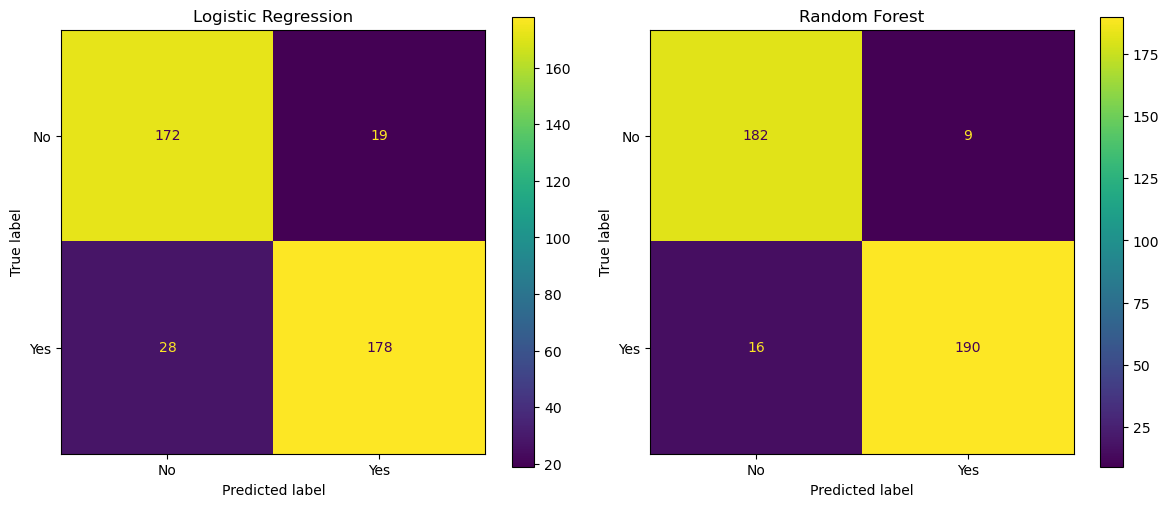

In [100]:
lr_y_proba = lr_model.predict_proba(X_test)[:, 1]
rf_y_proba = rf_model.predict_proba(X_test)[:, 1]

lr_y_proba_hype = lr_grid_search.predict_proba(X_test)[:, 1]
rf_y_proba_hype = rf_grid_search.predict_proba(X_test)[:, 1]

# ========================================================================

print("=== Logistic Regression ===")
print(classification_report(y_test, lr_y_pred))
print("ROC AUC :", roc_auc_score(y_test, lr_y_proba))

print("\n=== Random Forest ===")
print(classification_report(y_test, rf_y_pred))
print("ROC AUC:", roc_auc_score(y_test, rf_y_proba))

# ===== Hyperparameter Tuning =======

print("\n=== HYPERPARAMETER TUNING ===")
print("=== Logistic Regression ===")
print(classification_report(y_test, lr_y_pred))
print("ROC AUC :", roc_auc_score(y_test, lr_y_proba_hype))
print("=== Random Forest ===")
print(classification_report(y_test, rf_y_pred))
print("ROC AUC :", roc_auc_score(y_test, rf_y_proba_hype))


# =======================================================================

# ==== Confusion Matrix ====

# ===== Tanpa Handling Imbalance =====
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ConfusionMatrixDisplay.from_predictions(y_test, lr_y_pred, ax=ax[0])
ax[0].set_title("Logistic Regression")

ConfusionMatrixDisplay.from_predictions(y_test, rf_y_pred, ax=ax[1])
ax[1].set_title("Random Forest")
plt.tight_layout()
plt.show()

### Best Model

In [101]:
# Simpan hasil evaluasi ke dict
results = []

# Logistic Regression
lr_report = classification_report(y_test, lr_y_pred, output_dict=True)
results.append({
    "Model": "Logistic Regression",
    "Accuracy": lr_report["accuracy"],
    "Precision (Yes)": lr_report["Yes"]["precision"],
    "Recall (Yes)": lr_report["Yes"]["recall"],
    "F1-Score (Yes)": lr_report["Yes"]["f1-score"],
    "ROC AUC": roc_auc_score(y_test, lr_y_proba)
})

# Random Forest
rf_report = classification_report(y_test, rf_y_pred, output_dict=True)
results.append({
    "Model": "Random Forest",
    "Accuracy": rf_report["accuracy"],
    "Precision (Yes)": rf_report["Yes"]["precision"],
    "Recall (Yes)": rf_report["Yes"]["recall"],
    "F1-Score (Yes)": rf_report["Yes"]["f1-score"],
    "ROC AUC": roc_auc_score(y_test, rf_y_proba)
})

# Logistic Regression (Hyperparameter Tuning)
lr_hype_report = classification_report(y_test, lr_y_pred, output_dict=True)
results.append({
    "Model": "Logistic Regression (Tuned)",
    "Accuracy": lr_hype_report["accuracy"],
    "Precision (Yes)": lr_hype_report["Yes"]["precision"],
    "Recall (Yes)": lr_hype_report["Yes"]["recall"],
    "F1-Score (Yes)": lr_hype_report["Yes"]["f1-score"],
    "ROC AUC": roc_auc_score(y_test, lr_y_proba_hype)
})

# Random Forest (Hyperparameter Tuning)
rf_hype_report = classification_report(y_test, rf_y_pred, output_dict=True)
results.append({
    "Model": "Random Forest (Tuned)",
    "Accuracy": rf_hype_report["accuracy"],
    "Precision (Yes)": rf_hype_report["Yes"]["precision"],
    "Recall (Yes)": rf_hype_report["Yes"]["recall"],
    "F1-Score (Yes)": rf_hype_report["Yes"]["f1-score"],
    "ROC AUC": roc_auc_score(y_test, rf_y_proba_hype)
})

# Buat DataFrame ringkasan
df_summary = pd.DataFrame(results)

# Tambahkan highlight warna hijau untuk nilai terbaik per kolom
styled_summary = df_summary.style.highlight_max(
    subset=["Accuracy", "Precision (Yes)", "Recall (Yes)", "F1-Score (Yes)", "ROC AUC"],
    color="blue"
)

styled_summary

,Model,Accuracy,Precision (Yes),Recall (Yes),F1-Score (Yes),ROC AUC
0,Logistic Regression,0.881612,0.903553,0.864078,0.883375,0.952753
1,Random Forest,0.937028,0.954774,0.922330,0.938272,0.988652
2,Logistic Regression (Tuned),0.881612,0.903553,0.864078,0.883375,0.927566
3,Random Forest (Tuned),0.937028,0.954774,0.922330,0.938272,0.992426


# Features Importance

## Logistic Regression

Logistic Regression : 
                       Feature  Coefficient
5      BP_History_Hypertension     3.246830
7   BP_History_Prehypertension    -2.755832
6            BP_History_Normal    -2.737345
17   Smoking_Status_Non-Smoker    -2.562545
12           Family_History_No    -2.541518
15          Exercise_Level_Low    -0.830351
16     Exercise_Level_Moderate    -0.722458
14         Exercise_Level_High    -0.693538
3               Sleep_Duration    -0.588348
2                 Stress_Score     0.378380
1                  Salt_Intake     0.320198
18       Smoking_Status_Smoker     0.316198
13          Family_History_Yes     0.295171
11            Medication_Other    -0.250239
9      Medication_Beta Blocker    -0.235948
4                          BMI     0.147152
10         Medication_Diuretic     0.126084
0                          Age     0.059729
8     Medication_ACE Inhibitor     0.026273



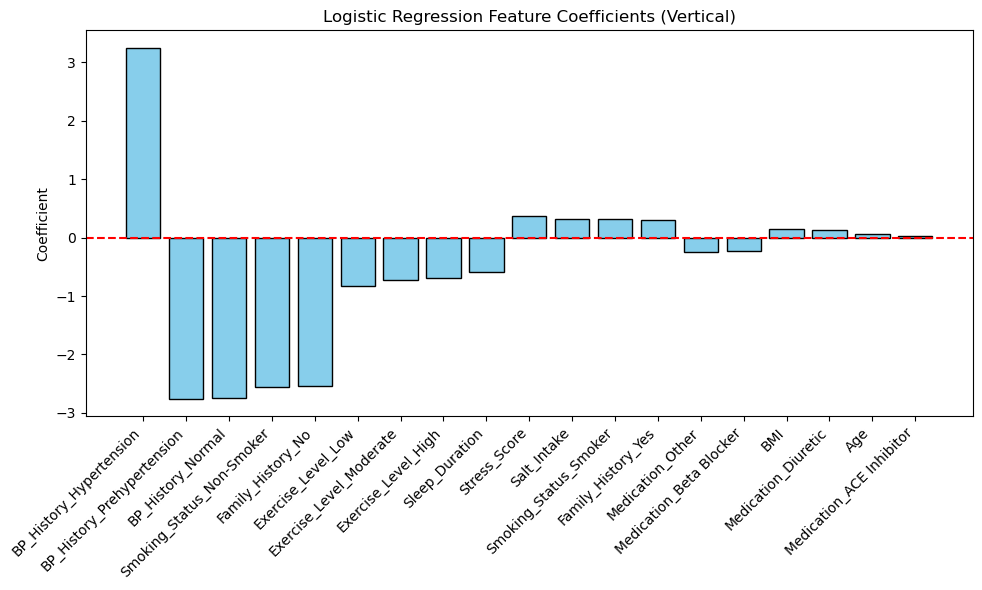

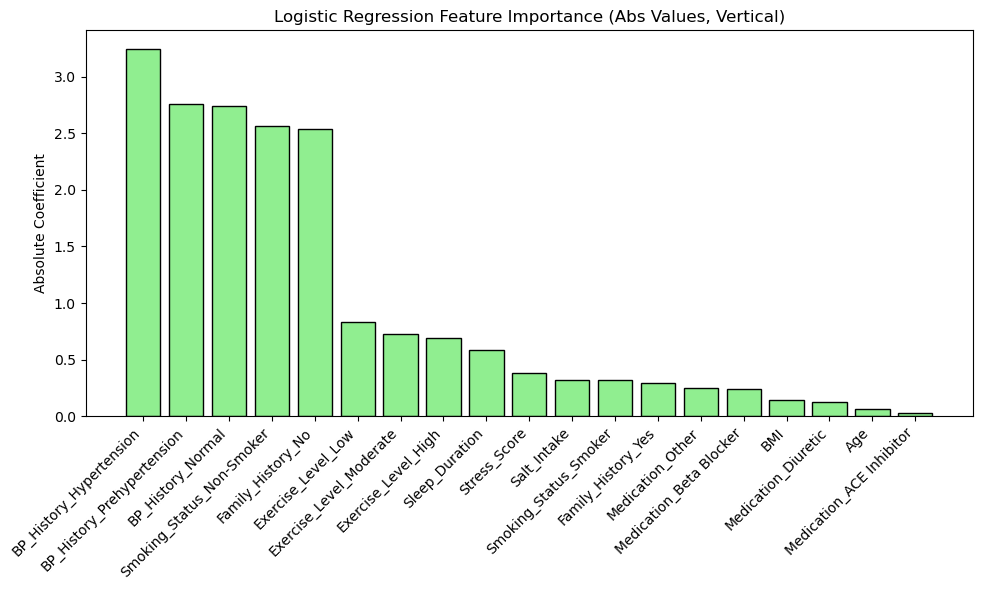

In [102]:
# Logistic Regression

# Ambil koefisien
lr_coef = lr_model.coef_[0]

features = X_train.columns

# Buat DataFrame untuk visualisasi
lr_dfi = pd.DataFrame({
    'Feature': features,
    'Coefficient': lr_coef,
    'Abs_Coefficient': np.abs(lr_coef)
}).sort_values(by='Abs_Coefficient', ascending=False)

# Tampilkan
print("Logistic Regression : ")
print(lr_dfi[['Feature', 'Coefficient']])
print("\n======================================")

# Visualisasi dengan nilai Plus Minus
plt.figure(figsize=(10,6))
plt.bar(lr_dfi['Feature'], lr_dfi['Coefficient'], color="skyblue", edgecolor="black")
plt.axhline(0, color="red", linestyle="--")  # garis nol
plt.xticks(rotation=45, ha="right")
plt.ylabel("Coefficient")
plt.title("Logistic Regression Feature Coefficients (Vertical)")
plt.tight_layout()
plt.show()

# Visualisasi dengan nilai Absolute
plt.figure(figsize=(10,6))
plt.bar(lr_dfi['Feature'], lr_dfi['Abs_Coefficient'], color="lightgreen", edgecolor="black")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Absolute Coefficient")
plt.title("Logistic Regression Feature Importance (Abs Values, Vertical)")
plt.tight_layout()
plt.show()

## Random Forest

Random Forest : 
                       Feature  Importance
5      BP_History_Hypertension    0.209427
0                          Age    0.116333
2                 Stress_Score    0.102045
4                          BMI    0.096595
1                  Salt_Intake    0.090809
3               Sleep_Duration    0.085886
7   BP_History_Prehypertension    0.047477
6            BP_History_Normal    0.047384
17   Smoking_Status_Non-Smoker    0.043568
12           Family_History_No    0.040288
13          Family_History_Yes    0.038954
18       Smoking_Status_Smoker    0.031746
8     Medication_ACE Inhibitor    0.008026
15          Exercise_Level_Low    0.007809
9      Medication_Beta Blocker    0.007673
16     Exercise_Level_Moderate    0.007382
14         Exercise_Level_High    0.006772
11            Medication_Other    0.005988
10         Medication_Diuretic    0.005840



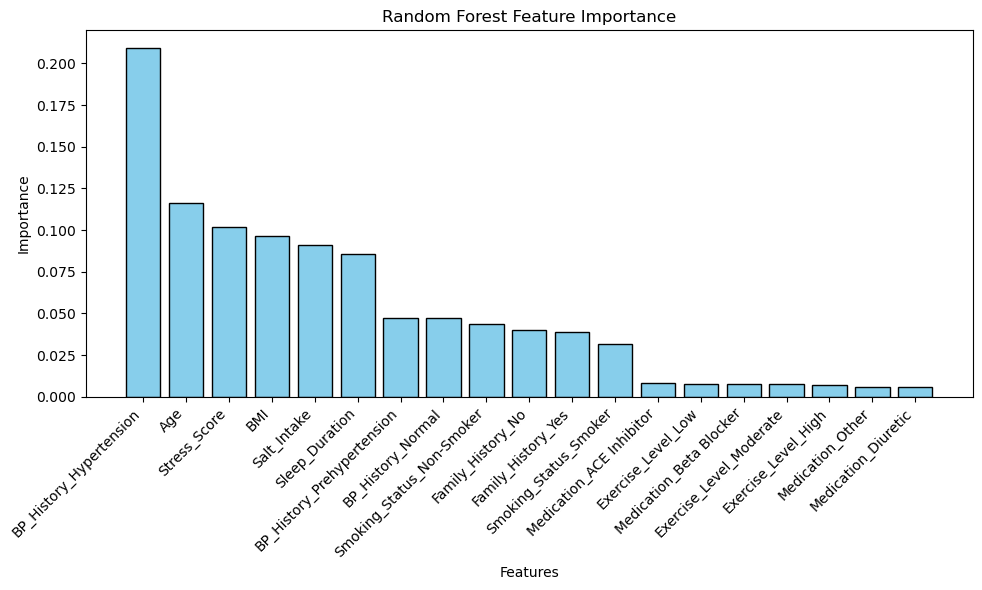

In [103]:
# Random Forest

# Ambil feature importance
fi_rf_ori = rf_model.feature_importances_

features = X_train.columns

# Buat dan tampilkan DataFrame
rf_dfi = pd.DataFrame({
    'Feature': features,
    'Importance': fi_rf_ori
}).sort_values(by='Importance', ascending=False)

# Tampilkan
print("Random Forest : ")
print(rf_dfi[['Feature', 'Importance']])
print("\n======================================")

# Visualisasi Random Forest
plt.figure(figsize=(10,6))
plt.bar(rf_dfi['Feature'], rf_dfi['Importance'], color="skyblue", edgecolor="black")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Random Forest Feature Importance")
plt.tight_layout()
plt.show()

# Deployment

In [104]:
best_model = rf_grid_search.best_estimator_
print(best_model.feature_names_in_)

['Age' 'Salt_Intake' 'Stress_Score' 'Sleep_Duration' 'BMI'
 'BP_History_Hypertension' 'BP_History_Normal'
 'BP_History_Prehypertension' 'Medication_ACE Inhibitor'
 'Medication_Beta Blocker' 'Medication_Diuretic' 'Medication_Other'
 'Family_History_No' 'Family_History_Yes' 'Exercise_Level_High'
 'Exercise_Level_Low' 'Exercise_Level_Moderate'
 'Smoking_Status_Non-Smoker' 'Smoking_Status_Smoker']


In [ ]:
import pickle

from fastapi import FastAPI

app = FastAPI()

# Simpan model hasil training
pickle.dump(best_model, open("hypertension_model.pkl", "wb"))

# Load model
model = pickle.load(open("hypertension_model.pkl", "rb"))

@app.post("/predict")
def predict(data: dict):
    df = pd.DataFrame([data])
    pred = model.predict(df)[0]
    return {"prediction": int(pred)}